In [1]:
import matplotlib.pyplot as plt

In [2]:
class LCG:
    seed = 32 
    alpha = 1664525
    c = 1013904223
    m = 2 ** 32
    x_n = seed
    
    @staticmethod
    def random():
        LCG.x_n = (LCG.alpha * LCG.x_n + LCG.c) % LCG.m
        return LCG.x_n / LCG.m
    

In [3]:
generator = LCG()
number_samples = 10 ** 6

### Task 1

In [4]:
def getGeneratorBool(p):
    return generator.random() < p

In [5]:
theory_p = 0.71

In [6]:
count_true = sum(1 for _ in range(number_samples) if getGeneratorBool(theory_p))
count_false = number_samples - count_true
practical_p = count_true / number_samples
print(practical_p)
print(1 - practical_p)

0.709961
0.29003900000000005


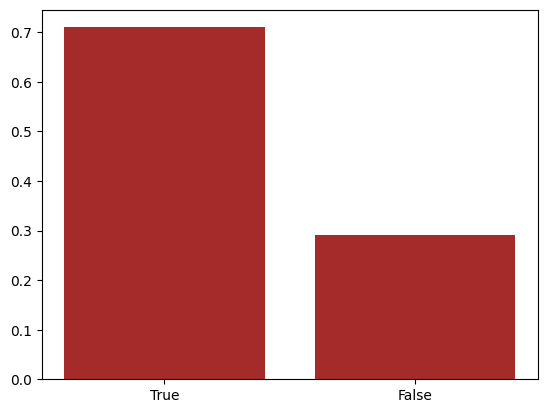

In [7]:
labels = ['True', 'False']
values = [count_true / number_samples, count_false / number_samples]

plt.bar(labels, values, color='brown')
plt.show()

### Task 2

In [8]:
def generator_complex(probabilities):
    result = []
    
    for i in probabilities:
        result.append(getGeneratorBool(i))

    return result


def task2(method_name, parameters):
    for i in range(number_samples):
        arr_result = method_name(parameters)
        for j in range(len(arr_result)):
            if arr_result[j]:
                arr[j][0] += 1
            else:
                arr[j][1] += 1

k_probabilities = [0.65,0.8, 0.6]
arr = [[0 for j in range(2)] for i in range(len(k_probabilities))]

task2(generator_complex, k_probabilities)
print(arr)

[[650290, 349710], [799370, 200630], [600269, 399731]]


In [9]:
practical_p = []
for i in arr:
    practical_p.append(i[0] / (i[0] + i[1]))
print(practical_p)

[0.65029, 0.79937, 0.600269]


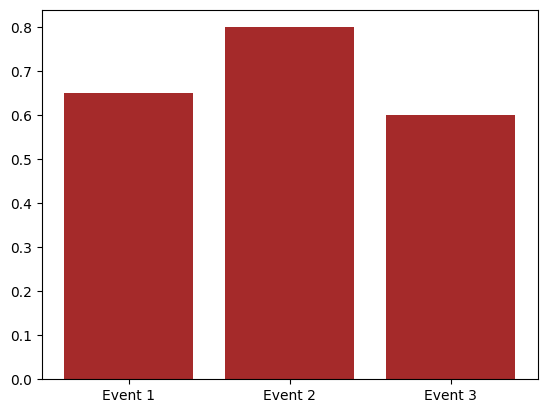

In [10]:
x_labels = [f"Event {i}" for i in range(1, len(k_probabilities) + 1)]

plt.bar([i for i in range(1, len(k_probabilities) + 1)], practical_p, color='brown')

plt.xticks(ticks=range(1, len(k_probabilities) + 1), labels=x_labels)

plt.show()

### Task 3

$$ P(A \cap B) = P(A) \cdot P(B|A) $$
$$ P(A' \cap B) = (1 - P(A)) \cdot P(B|A') $$
$$ P(A \cap B') = P(A) \cdot (1 - P(B|A)) $$
$$ P(A' \cap B') = (1 - P(A)) \cdot (1 - P(B|A')) $$

In [11]:
def generator_complex_dependent(a_probability, b_a_probability):
    b_not_a_probability = 1 - b_a_probability
    arr_ranges = []
    arr_ranges.append(a_probability * b_a_probability)
    arr_ranges.append((1 - a_probability) * b_not_a_probability +arr_ranges[0])
    arr_ranges.append(a_probability * (1 - b_a_probability)+arr_ranges[1])
    arr_ranges.append((1 - a_probability) * (1 - b_not_a_probability)+arr_ranges[2])
    num = generator.random()
   
    for i in range(len(arr_ranges)):
        if num <= arr_ranges[i]:
            return i
            
def task3(method_name, param):
    for i in range(number_samples):
        num = method_name(param[0], param[1])
        arr_result[num] += 1

    return arr_result

arr_result = [0 for i in range(4)]
    
task3(generator_complex_dependent, [0.5, 0.7])

[349926, 149677, 149415, 350982]

In [12]:
practical_p = [arr_result[i] / number_samples for i in range(4)]
print(practical_p)

[0.349926, 0.149677, 0.149415, 0.350982]


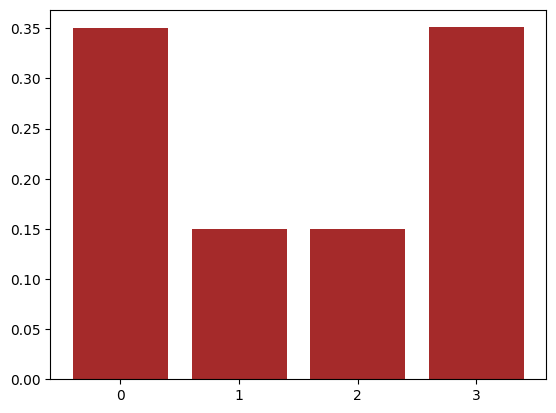

In [13]:
plt.bar([str(i) for i in range(4)],
        [arr_result[i] / number_samples for i in range(4)], color='brown')
plt.show()

### Task 4

In [14]:
def generator_full_group(probabilities):
    arr_ranges = []
    prev = 0
    for i in probabilities:
        prev += i
        arr_ranges.append(prev)

    num = generator.random()
    
    for i in range(len(arr_ranges)):
        if num <= arr_ranges[i]:
            return i


def test_4(method_name, param):
    arr_result = [0 for i in range(len(param))]
    
    for i in range(number_samples):
        num = method_name(param)
        arr_result[num] += 1

    return arr_result
        
count = test_4(generator_full_group, [0.1, 0.2, 0.3, 0.4])

In [15]:
practical_p = []
for i in count:
    practical_p.append(i / number_samples)
print(practical_p)


[0.099662, 0.299564, 0.200094, 0.40068]


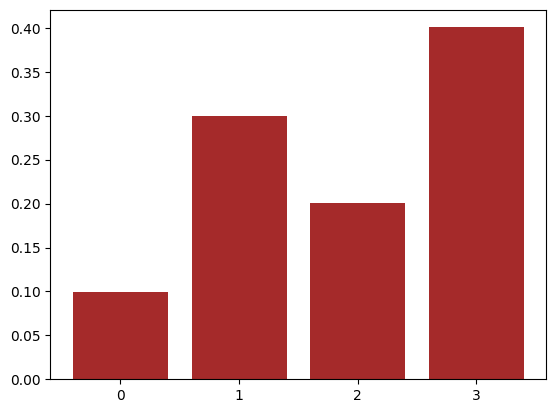

In [16]:
plt.bar([str(i) for i in range(len(count))],
        [count[i] / number_samples for i in range(len(count))], color='brown')
plt.show()